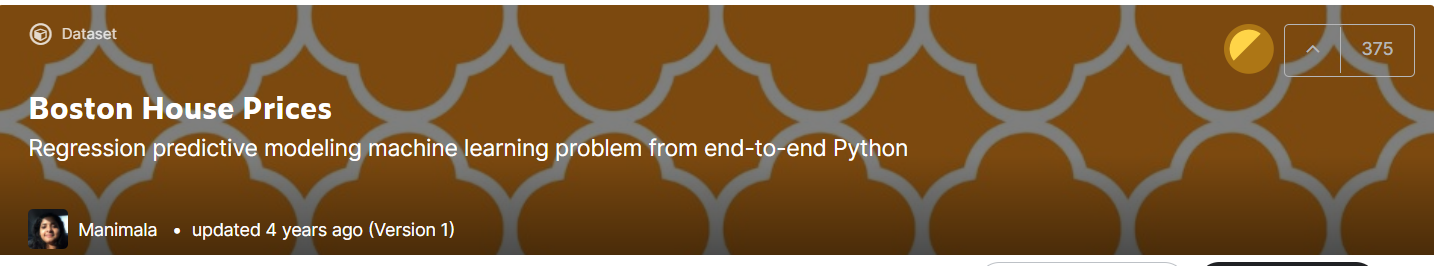

ref) https://www.kaggle.com/prasadperera/the-boston-housing-dataset

### 1. Data Load

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.linear_model import Ridge,RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [18]:
data_dict = load_boston()
data_dict.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [19]:
data_dict['target'][:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [20]:
data_dict['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

#### 데이터 프레임 만들기

In [21]:
df = pd.DataFrame(data=data_dict['data'],columns=data_dict['feature_names'])
df['price']=data_dict['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [23]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


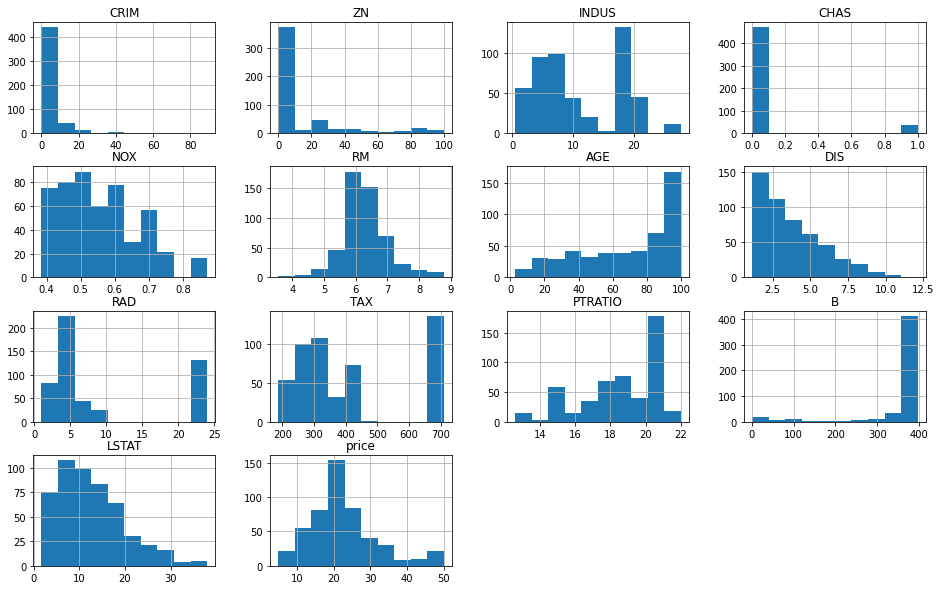

In [24]:
df.hist(figsize=(16,10))
plt.show()

_____________________________________________________________

### 2. EDA

#### 컬럼 대문자 > 소문자 변경

In [25]:
# 방법1
col = df.columns.tolist()

for i,e in enumerate(col):
    col[i]=e.lower()

print(col)

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'price']


In [26]:
# 방법2
col = df.columns.tolist()

list = []
for i in col:
    i=i.lower()
    list.append(i)
    
print(list)

df.columns = list

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'price']


In [27]:
# 방법3
col_list=[col.lower for col in df.columns.tolist()]

______________________________________________________

### 3. Feature Engineering

<pre>
unique값
타겟피처 - 비슷한 유형 - 상관분석
주요 피처 - 아웃라이어
정규분포화
모델? / 점수?


#### unique 값

In [28]:
for col in df.columns:
    print(col,df[col].nunique(),df[col].unique()[:10])

crim 504 [0.00632 0.02731 0.02729 0.03237 0.06905 0.02985 0.08829 0.14455 0.21124
 0.17004]
zn 26 [ 18.    0.   12.5  75.   21.   90.   85.  100.   25.   17.5]
indus 76 [2.31 7.07 2.18 7.87 8.14 5.96 2.95 6.91 5.64 4.  ]
chas 2 [0. 1.]
nox 81 [0.538 0.469 0.458 0.524 0.499 0.428 0.448 0.439 0.41  0.403]
rm 446 [6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004]
age 356 [ 65.2  78.9  61.1  45.8  54.2  58.7  66.6  96.1 100.   85.9]
dis 412 [4.09   4.9671 6.0622 5.5605 5.9505 6.0821 6.5921 6.3467 6.2267 5.4509]
rad 9 [ 1.  2.  3.  5.  4.  8.  6.  7. 24.]
tax 66 [296. 242. 222. 311. 307. 279. 252. 233. 243. 469.]
ptratio 46 [15.3 17.8 18.7 15.2 21.  19.2 18.3 17.9 16.8 21.1]
b 357 [396.9  392.83 394.63 394.12 395.6  386.63 386.71 392.52 390.5  380.02]
lstat 455 [ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1 ]
price 229 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


#### 타입 변경 

In [29]:
df[['chas','rad','tax']] = df[['chas','rad','tax']].astype('int')

### 1차 점수

In [30]:
def myscore(y_test,pred,model_name=None):
    mse = mean_squared_error(y_test,pred)
    rmse = mean_squared_error(y_test,pred,squared=False)
    #msle = mean_squared_log_error(y_test,pred)
    mae = mean_absolute_error(y_test,pred)
    print(f'MSE:{mse:.4f} RMSE:{rmse:.4f}  MAE:{mae:4f}')

In [31]:
def fit_score(df):

    X= df[df.columns.difference(['price'])]
    y= df["price"]
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

    model_list = [LinearRegression(),Lasso(),ElasticNet(),Ridge(),XGBRegressor(),LGBMRegressor()]

    for model in model_list:
        model.fit(X_train,y_train)
        pred= model.predict(X_test)
        myscore(y_test,pred)

In [32]:
fit_score(df)

MSE:24.2911 RMSE:4.9286  MAE:3.189092
MSE:24.4094 RMSE:4.9406  MAE:3.253531
MSE:23.9684 RMSE:4.8958  MAE:3.243990
MSE:24.4772 RMSE:4.9474  MAE:3.132947
MSE:7.3299 RMSE:2.7074  MAE:1.989960
MSE:8.3388 RMSE:2.8877  MAE:2.002545


#### 상관분석 / 다중공선성

다중공선성을 확인 하는 방법은 크게 3가지가 있습니다. 
 
* Heatmap 그래프를 통한 확인
* Scatter plot을 통한 확인 
* VIF(Variance Inflation Factors, 분산팽창요인)을 통한 확인 

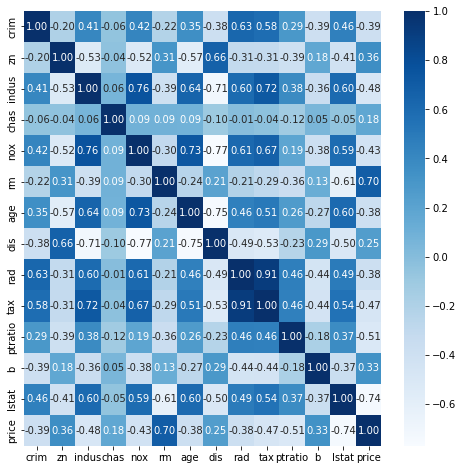

In [33]:
#Heatmap 그래프를 통한 확인
fig, ax = plt.subplots(figsize=(8,8)) 
#plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()

* feature간 유기적 관계가 있다.
* 다중공선성: tax-rad 해결: rad을 drop or tax+rad = PCA
* (+) rm  (-) lstat

In [34]:
#VIF(Variance Inflation Factors, 분산팽창요인)을 통한 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif_factor']= [variance_inflation_factor(df.values, i) 
                    for i in range(df.shape[1])]

vif['feature'] = df.columns
vif = vif.sort_values('vif_factor').reset_index(drop=True)
# drop=True 옵션을 지정해주면 인덱스로 지정은 하되, 기존열을 남겨놓는다.
vif

,vif_factor,feature
0,1.176266,chas
1,2.131404,crim
2,2.910004,zn
3,12.615188,lstat
4,14.485874,indus
5,15.369980,rad
6,15.430455,dis
7,21.351015,b
8,21.398863,age
9,24.503206,price


In [35]:
pd.crosstab(df['tax'],df['rad'])
# df['tax'],df['rad'] 해결방안? pca(차원축소)

rad,1,2,3,4,5,6,7,8,24
tax,,,,,,,,,
187,0,0,0,0,1,0,0,0,0
188,0,7,0,0,0,0,0,0,0
193,0,0,8,0,0,0,0,0,0
198,1,0,0,0,0,0,0,0,0
216,0,0,1,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...
432,0,0,0,0,0,9,0,0,0
437,0,0,0,15,0,0,0,0,0
469,0,0,1,0,0,0,0,0,0


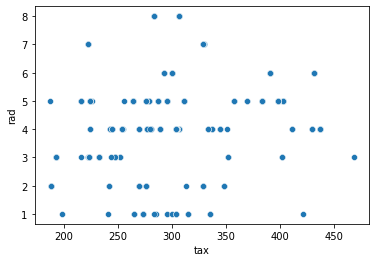

In [36]:
df[['tax','rad']].head()
sns.scatterplot(data=df[df['tax']<=600],x='tax',y='rad') #조건(tax 600이하)
plt.show()
## to do: tax>600 아웃라이어 처리 할?말?

#### outlier

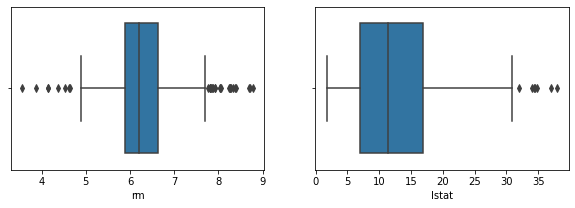

In [37]:
f,ax = plt.subplots(1,2,figsize=(10,3))
sns.boxplot(x=df['rm'],ax=ax[0])
sns.boxplot(x=df['lstat'],ax=ax[1])
plt.show()

#### 정규분포화(스케일링)

- df전체를 대상으로 할 예정
- target도 스케일링 but 이후 원본으로 복원시켜야 함
- target은 로그 변환 + 스케일링 둘다 한다.

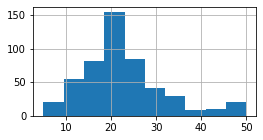

In [38]:
df['price'].hist(figsize=(4,2))
plt.show()

In [39]:
#로그 스케일링 > feature 특징이 사라지는 경우가 있으므로 조심! 
df['price'] = np.log1p(df['price'])

In [40]:
fit_score(df)

MSE:0.0353 RMSE:0.1880  MAE:0.125992
MSE:0.0692 RMSE:0.2630  MAE:0.191748
MSE:0.0525 RMSE:0.2290  MAE:0.167401
MSE:0.0359 RMSE:0.1896  MAE:0.124314
MSE:0.0200 RMSE:0.1415  MAE:0.095956
MSE:0.0189 RMSE:0.1374  MAE:0.094413


#### 방법1) df전체 스케일링

In [41]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
st.fit(df)
df_scaler = st.transform(df) #df전체 대상 스케일링

In [42]:
fit_score(df)

MSE:0.0353 RMSE:0.1880  MAE:0.125992
MSE:0.0692 RMSE:0.2630  MAE:0.191748
MSE:0.0525 RMSE:0.2290  MAE:0.167401
MSE:0.0359 RMSE:0.1896  MAE:0.124314
MSE:0.0200 RMSE:0.1415  MAE:0.095956
MSE:0.0189 RMSE:0.1374  MAE:0.094413


#### 방법 2) 왜도,첨도가 심한 feature들만 스케일링 (target 포함)

In [43]:
# 왜도
df.skew()

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
price     -0.241244
dtype: float64

In [44]:
#왜도가 2 이상인 컬럼 추출 > 스케일링
col_list = df.skew()[df.skew()>2].index
col_list = ['crim', 'zn', 'chas', 'price']
scaler = StandardScaler()
df[col_list]=scaler.fit_transform(df[col_list])
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,-0.419782,0.284830,2.31,-0.272599,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,0.345176
1,-0.417339,-0.487722,7.07,-0.272599,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0.084104
2,-0.417342,-0.487722,7.07,-0.272599,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1.266776
3,-0.416750,-0.487722,2.18,-0.272599,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1.170822
4,-0.412482,-0.487722,2.18,-0.272599,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,1.373242


In [45]:
fit_score(df)

MSE:0.2364 RMSE:0.4862  MAE:0.325913
MSE:0.3360 RMSE:0.5797  MAE:0.421066
MSE:0.3207 RMSE:0.5663  MAE:0.405020
MSE:0.2404 RMSE:0.4903  MAE:0.321523
MSE:0.1389 RMSE:0.3727  MAE:0.260406
MSE:0.1252 RMSE:0.3538  MAE:0.243991


#### 확인용

In [46]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
st.fit(df)
df_scaler = st.transform(df)

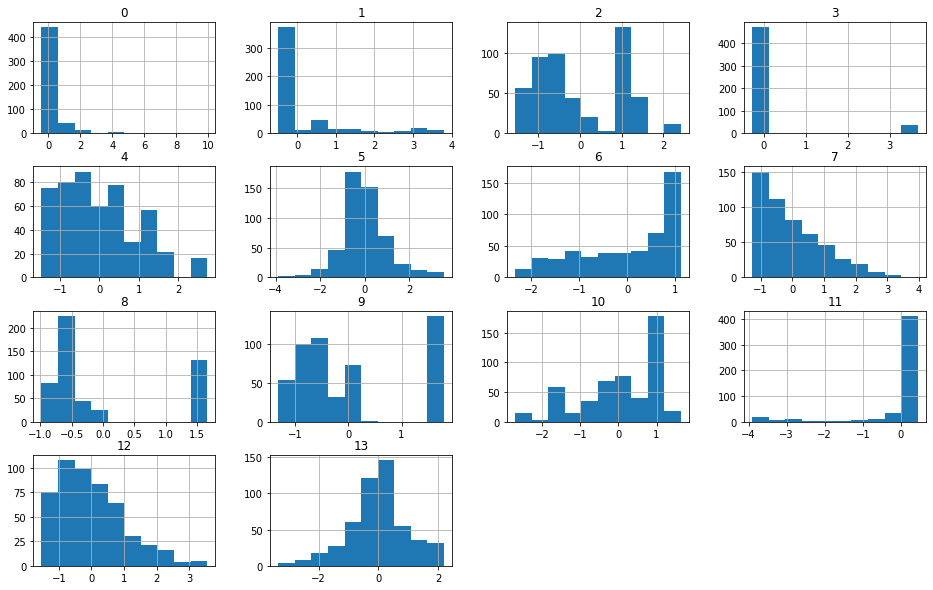

In [47]:
df_scaler = pd.DataFrame(df_scaler)
df_scaler.hist(figsize=(16,10))
plt.show()

### 다중공선성 처리 
- 방법1) 스케일링, 이상치 처리 후 PCA
- 방법2) 컬럼 DROP (target과 상관도가 적은 컬럼 버리기)

<AxesSubplot:xlabel='tax', ylabel='rad'>

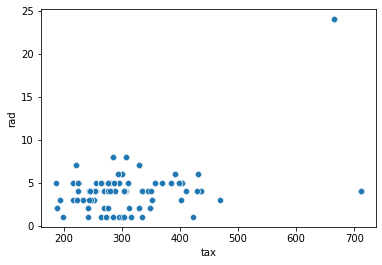

In [48]:
#방법1
sns.scatterplot(data=df, x="tax", y="rad")

In [49]:
df.shape

(506, 14)

In [50]:
drop_idx = df[df['tax'] >= 600].index.tolist()
df = df.drop(drop_idx, axis=0)

In [51]:
df.shape

(369, 14)

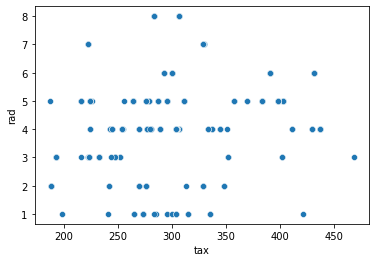

In [52]:
sns.scatterplot(data=df[df['tax']<=600], x="tax", y="rad")
plt.show()

In [53]:
fit_score(df)

MSE:0.0599 RMSE:0.2447  MAE:0.189285
MSE:0.2454 RMSE:0.4953  MAE:0.382320
MSE:0.2143 RMSE:0.4629  MAE:0.357508
MSE:0.0589 RMSE:0.2427  MAE:0.185525
MSE:0.0797 RMSE:0.2823  MAE:0.220796
MSE:0.0697 RMSE:0.2639  MAE:0.199829


In [54]:
#방법2
df = df.drop(['rad'],axis=1)
df.shape

(369, 13)

In [55]:
fit_score(df)

MSE:0.0646 RMSE:0.2542  MAE:0.194660
MSE:0.2454 RMSE:0.4953  MAE:0.382320
MSE:0.2143 RMSE:0.4629  MAE:0.357508
MSE:0.0642 RMSE:0.2534  MAE:0.192345
MSE:0.0826 RMSE:0.2874  MAE:0.218345
MSE:0.0692 RMSE:0.2630  MAE:0.200417


### 모델 학습 및 평가

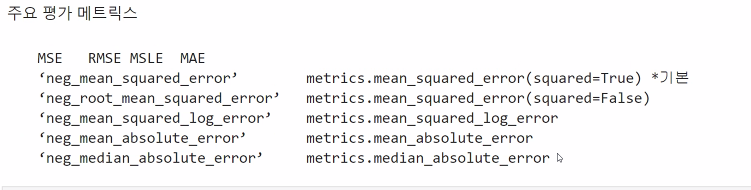

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.linear_model import Ridge,RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [57]:
def myscore(y_test,pred):
    mse = mean_squared_error(y_test,pred)
    rmse = mean_squared_error(y_test,pred,squared=False)
    msle = mean_squared_log_error(y_test,pred)
    mae = mean_absolute_error(y_test,pred)
    print(f'MSE:{mse:.4f} RMSE:{rmse:.4f} MSLE:{msle:.4f} MAE:{mae:4f}')

In [58]:
def fit_score(df):

    X= df[df.columns.difference(['price'])]
    y= df["price"]

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

    model_list = [LinearRegression(),Lasso(),ElasticNet(),Ridge(),XGBRegressor(),LGBMRegressor()]

    for model in model_list:
        model.fit(X_train,y_train)
        pred= model.predict()
        myscore(y_test,pred)

### 검증 및 튜닝

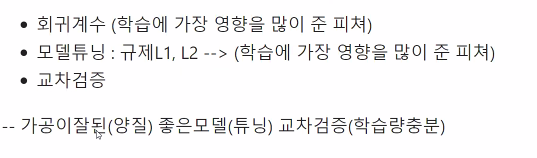

In [62]:
df.to_csv("./after_eng.csv",index=False)

In [63]:
df=pd.read_csv("./after_eng.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,price
0,-0.419782,0.284830,2.31,-0.272599,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,0.345176
1,-0.417339,-0.487722,7.07,-0.272599,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,0.084104
2,-0.417342,-0.487722,7.07,-0.272599,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,1.266776
3,-0.416750,-0.487722,2.18,-0.272599,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,1.170822
4,-0.412482,-0.487722,2.18,-0.272599,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,1.373242
